In [27]:
import pandas as pd
import numpy as np
from skimage.io import imread, imshow
from skimage.color import rgba2rgb
from skimage.transform import resize
import os
import matplotlib.pyplot as plt
%matplotlib inline

'''
This notebook is for exploring different image feature extraction techniques.
'''
IMAGE_FOLDER = '../data/images/images'

In [41]:
'''
Iterate through the images to get their size. 
'''
images = os.listdir(IMAGE_FOLDER)
image_sizes = []
for image_file in images:
    image = imread('{}/{}'.format(IMAGE_FOLDER, image_file))
    if len(image.shape) == 2:
        width, height = image.shape
        shape = (width, height, 0)
    else:
        shape = image.shape
    width, height, channels = shape
    image_sizes.append([width, height, channels])

image_df = pd.DataFrame(image_sizes, columns=['height', 'width', 'channels'])
image_df.describe()

,height,width,channels
count,8873.000000,8873.000000,8873.000000
mean,26.235321,25.549532,3.597205
std,205.717365,203.828911,0.975027
min,4.000000,15.000000,0.000000
25%,15.000000,15.000000,4.000000
50%,15.000000,15.000000,4.000000
75%,15.000000,15.000000,4.000000
max,7200.000000,6810.000000,4.000000


In [46]:
'''
Most of the images are 4 channel (RGBA). No important difference between RGB and RGBA.
Indicator variable colored = 1/0  could be relevent to price.
'''

num_greyscale = len(image_df[image_df.channels == 0])
print(num_greyscale/len(image_df))

0.05916826327059619


(14, 15, 3)
(14, 15, 3)


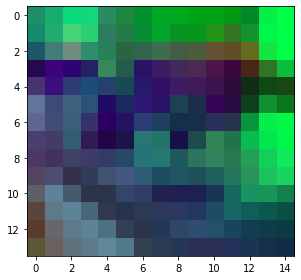

In [47]:
sample_image = 'ffc14dfa2038d68cf4f67ad39906addd.gif'
image = imread('{}/{}'.format(IMAGE_FOLDER, sample_image))
image = rgba2rgb(image)
print(image.shape)
testimage = resize(image, (15, 15))
print(image.shape)

imshow(image)

In [48]:
width, height, channels = image.shape
mean_pixel_matrix = np.zeros((width, height))

for w in range(width):
    for h in range(height):
        mean_pixel_matrix[w][h] = (image[w][h][0] + image[w][h][1] + image[w][h][2])/channels

mean_pixel_matrix = mean_pixel_matrix.reshape(width * height, -1)
